<a href="https://colab.research.google.com/github/JRPearson500/OpenAmbHack/blob/main/openAmbulance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open Ambulance Data
22-07-2022
jonathanpearson@nhs.net

### Notes
https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/ambulance-systems-indicators-ambsys
https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/07/20220714-AQI-Stats-Note.pdf
https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/09/20190912-AmbSYS-specification.pdf
https://www.england.nhs.uk/wp-content/uploads/2019/09/Operational_productivity_and_performance_NHS_Ambulance_Trusts_final.pdf


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import io
from google.colab import files


# Import and Structure Data

In [ ]:
# Import AmbSys-to-June22-nodots
uploaded = files.upload()
df_AmbSys = pd.read_csv(io.BytesIO(uploaded['AmbSYS-to-Jun22-nodots.csv']))

Saving AmbSYS-to-Jun22-nodots.csv to AmbSYS-to-Jun22-nodots.csv


In [ ]:
# Import AmbSYSindicatorlist
uploaded = files.upload()
df_AmbSysIndicatorList = pd.read_csv(io.BytesIO(uploaded['AmbSYSindicatorlist.csv']))
df_AmbSysIndicatorList.head()

Saving AmbSYSindicatorlist.csv to AmbSYSindicatorlist.csv


,indicator,cat,type,name
0,A0,Contact,count,Contact_count
1,A1,999 call,count,999 call_count
2,A2,999 call answer,total time,999 call answer_total time
3,A3,999 call answer,mean time,999 call answer_mean time
4,A4,999 call answer,50th centile time,999 call answer_50th centile time


In [ ]:
ambSerName = {'RX9': 'EMAS',
               'RYC': 'EEAST',
               'RRU': 'LAS',
               'RX6': 'NEAS',
               'RX7': 'NWAS',
               'RYE': 'SCAS',
               'RYD': 'SECAmb',
               'RYF': 'SWAS',
               'RYA': 'WMAS',
               'RX8': 'YAS',
               'R1F': 'IOW'
}

In [ ]:
# Import ccgtoAmbMapping
uploaded = files.upload()
df_ccgmapping = pd.read_csv(io.BytesIO(uploaded['ccgtoAmbMapping.csv']))

Saving ccgtoAmbMapping.csv to ccgtoAmbMapping.csv


In [ ]:
df_AmbSys.dtypes

Year          int64
Month         int64
Region       object
Org Code     object
Org Name     object
             ...   
A69         float64
A70         float64
A71         float64
A72         float64
A73         float64
Length: 128, dtype: object

In [ ]:
# Intial vis of data
df_AmbSys=df_AmbSys.replace(['.'], np.nan)
df_AmbSys.describe(include = 'all')


,Year,Month,Region,Org Code,Org Name,A0,A1,A2,A3,A4,...,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73
count,1121.000000,1121.000000,1121,1121,1121,1.079000e+03,1.079000e+03,1.079000e+03,1079.000000,1079.000000,...,421.000000,4.520000e+02,452.000000,452.000000,3.140000e+02,314.000000,314.000000,4.520000e+02,452.000000,452.000000
unique,NaN,NaN,15,19,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Y59,Eng,England,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,177,59,59,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.542373,6.491525,NaN,NaN,NaN,1.633858e+05,1.209353e+05,1.920703e+06,14.195551,2.929564,...,11859.209026,1.089346e+07,6710.426991,14128.537611,4.635220e+05,8166.464968,15703.136943,1.706968e+07,9197.099558,19903.070796
std,1.477280,3.482119,NaN,NaN,NaN,2.106833e+05,1.570932e+05,4.586400e+06,21.057782,9.547977,...,4627.596425,1.436370e+07,1872.587612,4378.213030,5.501122e+05,2694.493899,6278.464865,2.252217e+07,2394.199092,5498.809351
min,2017.000000,1.000000,NaN,NaN,NaN,2.166000e+03,9.700000e+02,5.750000e+03,0.000000,0.000000,...,195.000000,1.464560e+05,3436.000000,6840.000000,2.879000e+03,2579.000000,2879.000000,3.664400e+04,2290.000000,9997.000000
25%,2018.000000,3.000000,NaN,NaN,NaN,8.999300e+04,6.515750e+04,2.393375e+05,4.000000,1.000000,...,9056.000000,4.167185e+06,5412.750000,11336.000000,1.213970e+05,6490.000000,12178.500000,6.259876e+06,7697.250000,16320.000000
50%,2020.000000,6.000000,NaN,NaN,NaN,1.141890e+05,8.361500e+04,5.266300e+05,7.000000,1.000000,...,11401.000000,7.341370e+06,6567.000000,13497.000000,3.100830e+05,7645.000000,14484.000000,1.107874e+07,8806.000000,18613.000000
75%,2021.000000,10.000000,NaN,NaN,NaN,1.536325e+05,1.155570e+05,1.763920e+06,14.000000,2.000000,...,14103.000000,1.111797e+07,7723.000000,15807.000000,6.163030e+05,9304.000000,17583.250000,1.815742e+07,10098.500000,21598.000000


In [ ]:
df_AmbSys.count()

Year        1121
Month       1121
Region      1121
Org Code    1121
Org Name    1121
            ... 
A69          314
A70          314
A71          452
A72          452
A73          452
Length: 128, dtype: int64

In [ ]:
df_AmbSys.columns = [c.replace(' ', '_') for c in df_AmbSys.columns]

In [ ]:
df_AmbSys.Org_Code.unique()

array(['Eng', 'Y63', 'Y62', 'Y60', 'Y61', 'Y56', 'Y59', 'Y58', 'RX9',
       'RYC', 'R1F', 'RRU', 'RX6', 'RX7', 'RYE', 'RYD', 'RYF', 'RYA',
       'RX8'], dtype=object)

In [ ]:
df_AmbSys["datetime"] = pd.to_datetime(df_AmbSys[['Year', 'Month']].assign(day=15))

In [ ]:
df_AmbSys.head()

,Year,Month,Region,Org_Code,Org_Name,A0,A1,A2,A3,A4,...,A65,A66,A67,A68,A69,A70,A71,A72,A73,datetime
0,2017,8,Eng,Eng,England,177540.0,141028.0,1796993.0,13.0,1.0,...,14233134.0,5993.0,11511.0,651465.0,6032.0,12612.0,25291867.0,9750.0,18657.0,2017-08-15
1,2017,8,North East and Yorkshire,Y63,North East and Yorkshire,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-15
2,2017,8,North West,Y62,North West,99343.0,75832.0,1466629.0,19.0,1.0,...,6173884.0,4699.0,10027.0,559592.0,5596.0,12455.0,4816254.0,5381.0,12379.0,2017-08-15
3,2017,8,Midlands,Y60,Midlands,78197.0,65196.0,330364.0,5.0,2.0,...,8059250.0,7596.0,13348.0,91873.0,11484.0,14577.0,20475613.0,12052.0,21964.0,2017-08-15
4,2017,8,East of England,Y61,East of England,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-15


In [ ]:
#pd.set_option('max_rows', 30)
df_AmbSys.groupby([df_AmbSys["datetime"], "Org_Code"]).A3.mean()

datetime    Org_Code
2017-08-15  Eng         13.0
            R1F          NaN
            RRU          NaN
            RX6          NaN
            RX7         19.0
                        ... 
2022-06-15  Y59         37.0
            Y60          6.0
            Y61         60.0
            Y62         22.0
            Y63         25.0
Name: A3, Length: 1121, dtype: float64

Appears R1F didn't submit till 04-2018.  Remove series before this point and reduce down to the 11 English Ambulance Services

In [ ]:
df_AmbSys_reduced = df_AmbSys[(df_AmbSys['datetime'] >= '2019-11-15') & (df_AmbSys['datetime'] <= '2022-08-15')]
df_AmbSys_reduced = df_AmbSys_reduced[df_AmbSys_reduced['Org_Code'].str.contains("R")] 

# Visual Investigations of Data Source

Graph time series for each ambulance service some of the metrics of interest.

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A25')

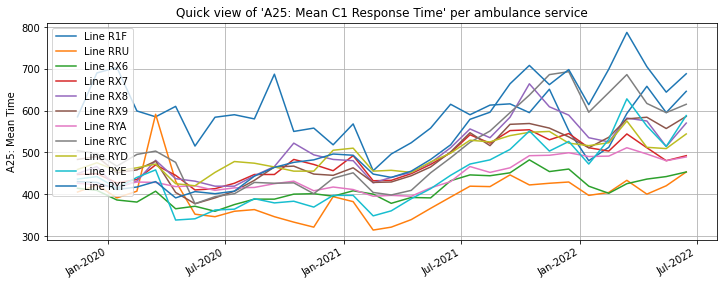

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A25: Mean C1 Response Time' per ambulance service")
axs.set_ylabel("A25: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A28')

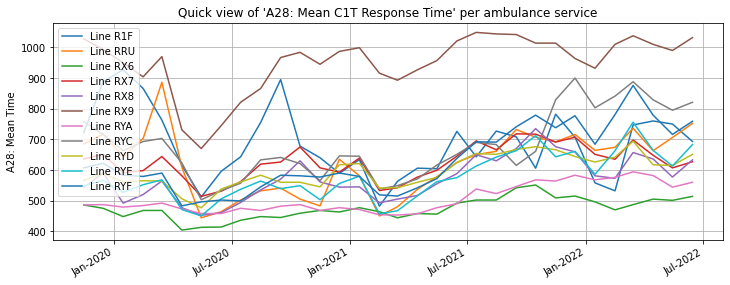

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A28: Mean C1T Response Time' per ambulance service")
axs.set_ylabel("A28: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A31')

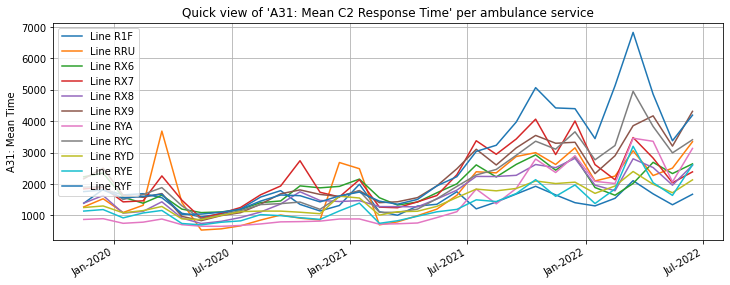

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A31: Mean C2 Response Time' per ambulance service")
axs.set_ylabel("A31: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A34')

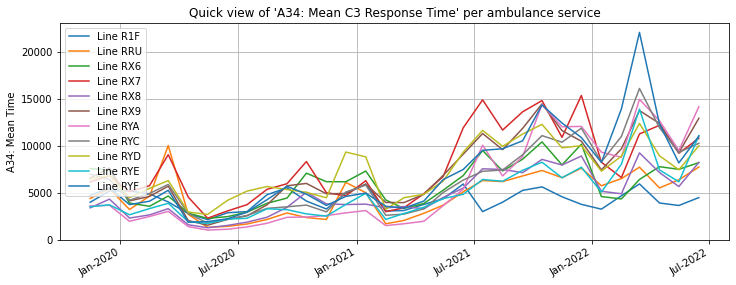

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A34: Mean C3 Response Time' per ambulance service")
axs.set_ylabel("A34: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A37')

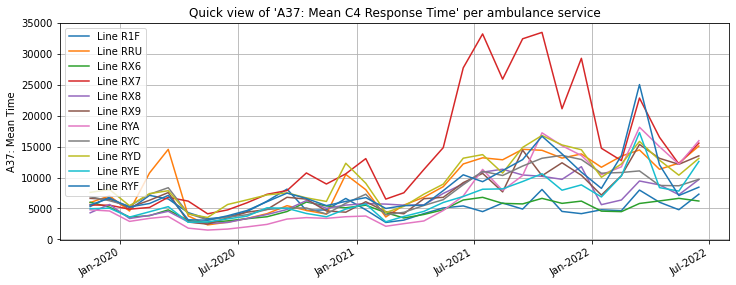

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A37: Mean C4 Response Time' per ambulance service")
axs.set_ylabel("A37: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A1')

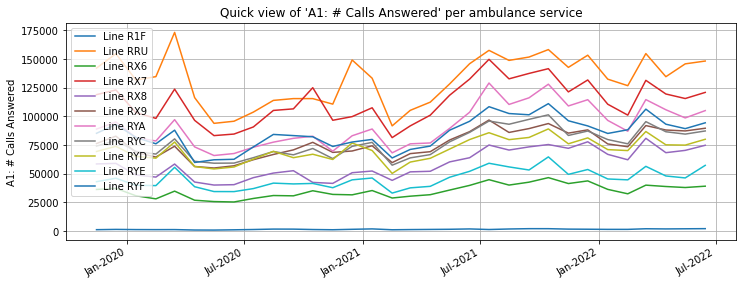

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A1: # Calls Answered' per ambulance service")
axs.set_ylabel("A1: # Calls Answered")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A3')

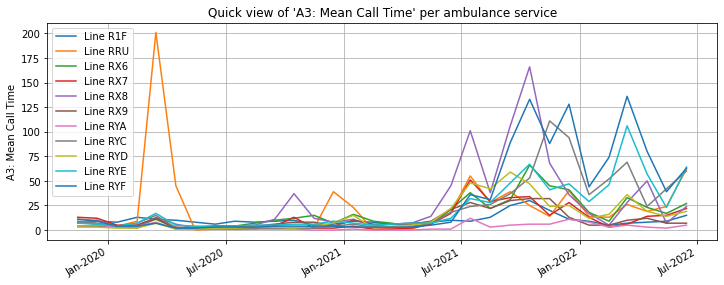

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A3: Mean Call Time' per ambulance service")
axs.set_ylabel("A3: Mean Call Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

RRU is London Ambulance trust.  Clearly the mean time had an issue at the start of Covid but has then done better than most other services more recently. 

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A7')

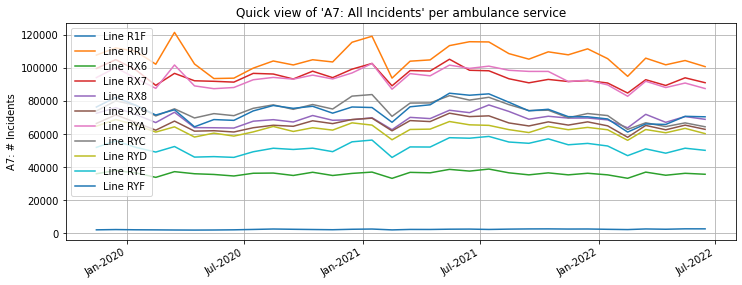

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A7: All Incidents' per ambulance service")
axs.set_ylabel("A7: # Incidents")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A115')

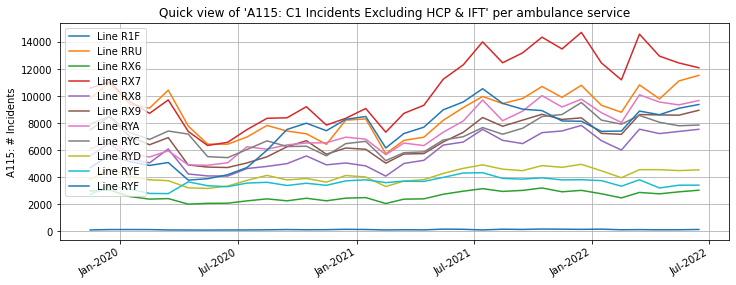

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A115: C1 Incidents Excluding HCP & IFT' per ambulance service")
axs.set_ylabel("A115: # Incidents")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A119')

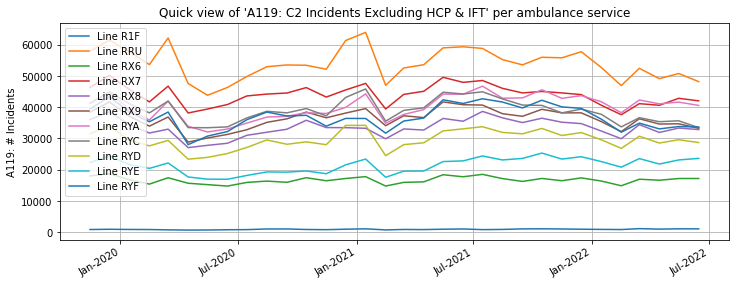

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A119: C2 Incidents Excluding HCP & IFT' per ambulance service")
axs.set_ylabel("A119: # Incidents")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A53')

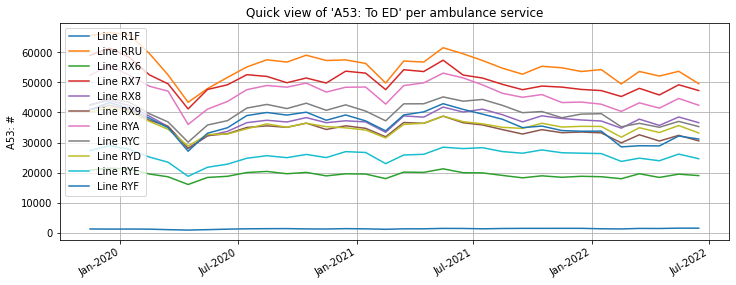

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A53: To ED' per ambulance service")
axs.set_ylabel("A53: #")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A56')

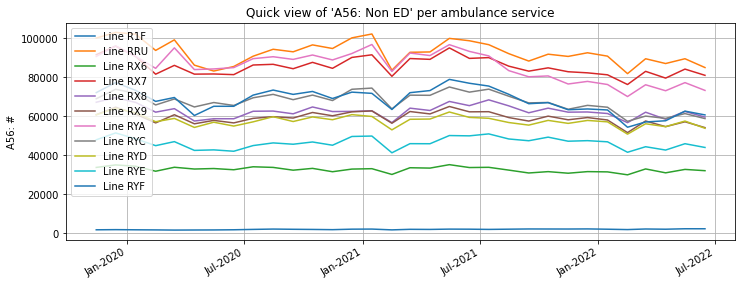

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A56: Non ED' per ambulance service")
axs.set_ylabel("A56: #")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A111')

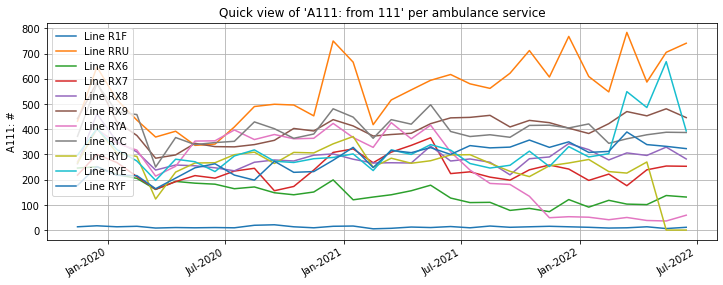

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A111: from 111' per ambulance service")
axs.set_ylabel("A111: #")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df_AmbSys_reduced.pivot(index='datetime',columns='Org_Code',values='A15')

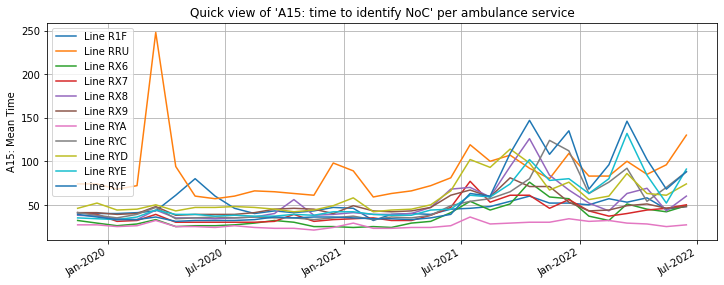

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))

#axs.plot('datetime', 'A3', data=data)
for col in data.columns:
    axs.plot(data[col], label='Line '+col)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
axs.grid(True)
axs.set_title("Quick view of 'A15: time to identify NoC' per ambulance service")
axs.set_ylabel("A15: Mean Time")
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.legend(loc='upper left')
plt.show()

# Discussion

## Thoughts from available stats releases
We can see from https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/07/20220714-AQI-Stats-Note.pdf that:
- the response times across all categories are worsening
- the deteriation appears to start at the onset of Covid restrictions in March 2020
- C1 & C1T appear to have similar trends and so will be treated together for speed
- C2,C3 & C4 appear to have similar trends and so will be treated together for speed
- C1/C1T have a different rate of deteriation from C2/C3/C4
- The mean and 90th show similar trends albeit the 90th elongating as would be expected for an increasing mean
- There was a spike in calls times around March 2020 which has become the current norm from Jun-21

## Our charts above show
- isle of wight is an outlier for C1 and East Midlands (RX9) are an outlier for C1T.  
- Across all response times we see a large variation across ambulance trusts but all still seem to have an underlying driver causing increases in the mean times.
- C4 response time increase are recently driven by North West (RX7)
- the mean call time spike in March 2020 was driven by London (RRU)
- C1 incidents appear to have increase but C2 haven't
- Number of "To ED" has remianed reasonable stable
- Incidents are stable!  Calls are increasing.
- a mixed picture from 111 call transfer with diffeerent services seeing increases and decreases.

## Questions
- Is the call time increasing because the operator stays on the call until ambulance arrives and the ambulances are taking longer to get there
- Why is NoC identification increasing (does this also depend on ambulance availability)
- Overall is there an issue with the calls or is it the ambulance availability which is driving the mean times and number of calls
- specific ambulance trust outlier questions
- Why are calls increasing (slightly) but incidents not
- Do we need to focus on HCP and ITF

## What to look at next
- Correlation:
  - Change in # calls answered Vs change in C1 and C2 response times
  - could we say that
    - Response Time ~ (number ambulances * mean call time) / call frequency
    - can we see a consistent number of abmulances per service from above
  - Do we need to look at IFTs more
  

# Correlation

In [ ]:
dataRX9 = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RX9")]
dataRYC = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RYC")]
dataR1F = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "R1F")]
dataRRU = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RRU")]
dataRX6 = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RX6")]
dataRX7 = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RX7")]
dataRYE = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RYE")]
dataRYD = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RYD")]
dataRYF = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RYF")]
dataRYA = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RYA")]
dataRX8 = df_AmbSys_reduced[(df_AmbSys_reduced['Org_Code'] == "RX8")]

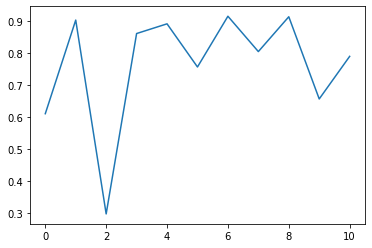

In [ ]:

corrA3A25 = []
corrA3A25.append(dataRX9["A3"].corr(dataRX9["A25"]))
corrA3A25.append(dataRYC["A3"].corr(dataRYC["A25"]))
corrA3A25.append(dataR1F["A3"].corr(dataR1F["A25"]))
corrA3A25.append(dataRRU["A3"].corr(dataRRU["A25"]))
corrA3A25.append(dataRX6["A3"].corr(dataRX6["A25"]))
corrA3A25.append(dataRX7["A3"].corr(dataRX7["A25"]))
corrA3A25.append(dataRYE["A3"].corr(dataRYE["A25"]))
corrA3A25.append(dataRYD["A3"].corr(dataRYD["A25"]))
corrA3A25.append(dataRYF["A3"].corr(dataRYF["A25"]))
corrA3A25.append(dataRYA["A3"].corr(dataRYA["A25"]))
corrA3A25.append(dataRX8["A3"].corr(dataRX8["A25"]))
plt.plot(corrA3A25)

Excluding Isle of Wight (R1F - index 2) as an outlier (the correlation between mean call time and C1 response times is between 0.6 and 0.9)

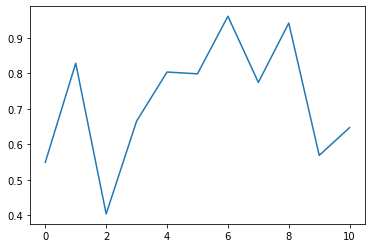

In [ ]:
corrA3A31 = []
corrA3A31.append(dataRX9["A3"].corr(dataRX9["A31"]))
corrA3A31.append(dataRYC["A3"].corr(dataRYC["A31"]))
corrA3A31.append(dataR1F["A3"].corr(dataR1F["A31"]))
corrA3A31.append(dataRRU["A3"].corr(dataRRU["A31"]))
corrA3A31.append(dataRX6["A3"].corr(dataRX6["A31"]))
corrA3A31.append(dataRX7["A3"].corr(dataRX7["A31"]))
corrA3A31.append(dataRYE["A3"].corr(dataRYE["A31"]))
corrA3A31.append(dataRYD["A3"].corr(dataRYD["A31"]))
corrA3A31.append(dataRYF["A3"].corr(dataRYF["A31"]))
corrA3A31.append(dataRYA["A3"].corr(dataRYA["A31"]))
corrA3A31.append(dataRX8["A3"].corr(dataRX8["A31"]))
plt.plot(corrA3A31)

Similar correlation levels and pattern across services for C2

# Fancy Visual (just because)

Can we show a map of ambulance services coloured by change from the same month in 2019 possibly with a scrll bar to move through time.

https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

In [ ]:
# Further Imports

import plotly
import plotly.graph_objs as go
import plotly.offline as offline

from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from urllib.request import urlopen
import json

In [ ]:
data = df_AmbSys_reduced
data.head()

,Year,Month,Region,Org_Code,Org_Name,A0,A1,A2,A3,A4,...,A65,A66,A67,A68,A69,A70,A71,A72,A73,datetime
521,2019,11,Y60,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,95089.0,76338.0,290380.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-15
522,2019,11,Y61,RYC,EAST OF ENGLAND AMBULANCE SERVICE NHS TRUST,111664.0,74139.0,700204.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-15
523,2019,11,Y59,R1F,ISLE OF WIGHT NHS TRUST,2561.0,1311.0,8956.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-15
524,2019,11,Y56,RRU,LONDON AMBULANCE SERVICE NHS TRUST,176428.0,142095.0,1566562.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-15
525,2019,11,Y63,RX6,NORTH EAST AMBULANCE SERVICE NHS FOUNDATION TRUST,52466.0,36353.0,303250.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-15


In [ ]:
# Set comparison month and year which will also be start date
startDatetime = df_AmbSys_reduced["datetime"].min()
data_slider = []

In [ ]:
with urlopen('https://nihr.opendatasoft.com/api/records/1.0/search/?dataset=ccg-boundaries&q=') as response: 
  ccgboundaries = json.load(response)

In [ ]:
for record in ccgboundaries["records"]:
    for k, v in record['fields'].items():
        if k == 'ccg21nm':
            print(v)

NHS Blackpool CCG
NHS Brighton and Hove CCG
NHS Bury CCG
NHS Chorley and South Ribble CCG
NHS Dorset CCG
NHS East Leicestershire and Rutland CCG
NHS East Staffordshire CCG
NHS Halton CCG
NHS Herts Valleys CCG
NHS Hull CCG


In [ ]:
data_ccgleftjoin = pd.merge(left=df_ccgmapping[['NHS CCG code','CCG name','Ambulance Code','Ambulance Service ']],right=data, how='left',left_on='Ambulance Code',right_on='Org_Code')

In [ ]:
data_ccgleftjoin.rename(columns = {'CCG name':'ccg21nm'}, inplace=True)

In [ ]:
# new str column for mouse hover
data_str = data_ccgleftjoin.copy()

for col in data_ccgleftjoin.columns:
    data_str[col] = data_ccgleftjoin[col].astype(str)

data_ccgleftjoin['text'] = data_str['Org_Code'] + ' A25 - C1 response times: ' + data_str['A25'] + 'A3 - Mean Call Time: ' + data_str['A3'] 

In [ ]:
data_ccgleftjoin = data_ccgleftjoin[['NHS CCG code','ccg21nm','Ambulance Code','Ambulance Service ','datetime','text','Org_Code','Org_Name','A3','A25']]
data_ccgleftjoin.head(n=100)

,NHS CCG code,ccg21nm,Ambulance Code,Ambulance Service,datetime,text,Org_Code,Org_Name,A3,A25
0,02Q,NHS Bassetlaw CCG,RX9,EMAS,2019-11-15,RX9 A25 - C1 response times: 483.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,4.0,483.0
1,02Q,NHS Bassetlaw CCG,RX9,EMAS,2019-12-15,RX9 A25 - C1 response times: 490.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,4.0,490.0
2,02Q,NHS Bassetlaw CCG,RX9,EMAS,2020-01-15,RX9 A25 - C1 response times: 451.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,3.0,451.0
3,02Q,NHS Bassetlaw CCG,RX9,EMAS,2020-02-15,RX9 A25 - C1 response times: 458.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,5.0,458.0
4,02Q,NHS Bassetlaw CCG,RX9,EMAS,2020-03-15,RX9 A25 - C1 response times: 479.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,12.0,479.0
...,...,...,...,...,...,...,...,...,...,...
95,04C,NHS Leicester City CCG,RX9,EMAS,2022-06-15,RX9 A25 - C1 response times: 586.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,7.0,586.0
96,03H,NHS North East Lincolnshire CCG,RX9,EMAS,2019-11-15,RX9 A25 - C1 response times: 483.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,4.0,483.0
97,03H,NHS North East Lincolnshire CCG,RX9,EMAS,2019-12-15,RX9 A25 - C1 response times: 490.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,4.0,490.0
98,03H,NHS North East Lincolnshire CCG,RX9,EMAS,2020-01-15,RX9 A25 - C1 response times: 451.0A3 - Mean Ca...,RX9,EAST MIDLANDS AMBULANCE SERVICE NHS TRUST,3.0,451.0


In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(data_ccgleftjoin, geojson=ccgboundaries, locations='ccg21nm', color='A25',
                           color_continuous_scale=scl,
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": -3.056805902750275, "lon": 53.77653973249381},
                           opacity=0.5,
                           labels={'A25':'C1 Response Time'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
datam = [ dict(
            type='choropleth', 
            colorscale = scl,
            autocolorscale = False,
            locations = data['Org_Code'], 
            z = data['A25'].astype(float), 
            locationmode = 'geojson-id', 
            text = data['text'], 
            marker = dict(     # for the boudary lines 
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 1) ),               
            colorbar = dict(
                        title = "C1 Response Time")
            ) 
       ]

In [ ]:
import requests
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#with urlopen('https://nihr.opendatasoft.com/api/records/1.0/search/?dataset=ccg-boundaries&q=') as response: 
#  ccgboundaries = json.load(response)


df = data_ccgleftjoin
fig = px.scatter_geo(
    df,
    locations="ccg21nm",
    size="A3",  # size of markers, "pop" is one of the columns of gapminder
)


fig = fig.add_trace(
    go.Scattergeo(
        lat=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 1].tolist() + [None]
                for record in ccgboundaries["records"]:
                  for k, v in record['fields'].items():
                    if k == 'ccg21nm':
                      v
            ]
            for v in sub
        ],
        lon=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 0].tolist() + [None]
                for f in ccgboundaries["records"][0]["fields"]["ccg21nm"]
            ]
            for v in sub
        ],
        line_color="brown",
        line_width=1,
        mode="lines",
        showlegend=False,
    )
)

fig.update_geos(
    visible=True, resolution=50, scope="world", showcountries=True, countrycolor="Black"
)

TypeError: ignored